In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi
from chapter12 import landing_position, trajectory, hang_time, ridge, flat_ground, trajectory_3d, landing_distance, landing_distance_gradient, gradient_ascent
import functools

%load_ext autoreload
%autoreload 2

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


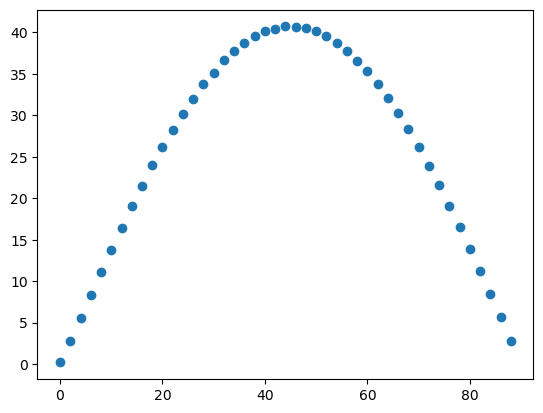

In [80]:
angles = range(0,90,2)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)


Exercise 12.1: How far does the cannonball go when fired at an angle of 50° from an initial height of zero? How about if it is fired at an angle of 130°?

In [81]:
landing_position(trajectory(50))

40.10994684444007

In [82]:
landing_position(trajectory(130))

-40.10994684444007

Exercise 12.2-Mini Project: Enhance the plot_trajectories function to draw a large dot on the trajectory graph at each passing second so we can see the passing of time on the plot.


In [83]:
def get_time_indecies(ts):
    t = 0
    times_index = []
    for i,time in enumerate(ts):
        if time >= t:
            times_index.append(i)
            t += 1
    return times_index

def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            time_indecies = get_time_indecies(traj[0])
            plt.scatter([xs[t_i] for t_i in time_indecies], [zs[t_i] for t_i in time_indecies])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

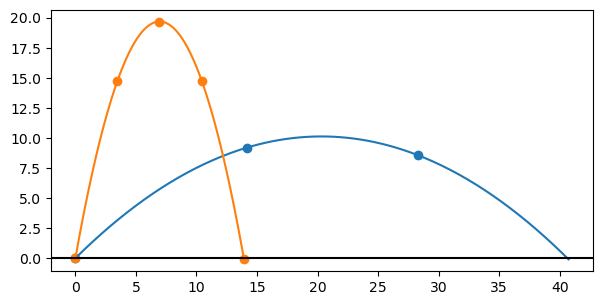

In [84]:
plot_trajectories(*[trajectory(45), trajectory(80)], show_seconds=True)

Exercise 12.3: Make a scatter plot of hang time versus angle for angles between 0 and 180°. Which launch angle produces the maximum hang time?

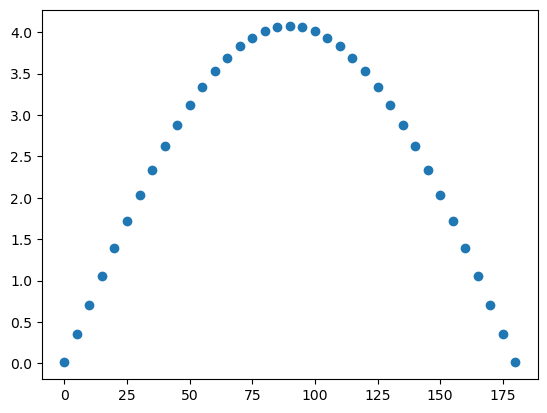

In [85]:
angles = range(0, 181, 5)
hang_times = list(map(lambda theta: hang_time(trajectory(theta)), angles))
plt.scatter(angles, hang_times)

In [86]:
heighest_point = functools.reduce(lambda acc,curr: curr if curr[1] > acc[1] else acc, zip(angles, hang_times))
print(f"Angle with the heighest elevation: {heighest_point[0]}")

Angle with the heighest elevation: 90


Exercise 12.4−Mini Project: Write a function plot_trajectory_metric that plots the result of any metric we want over a given set of theta (θ) values.
plot_trajectory_metric(landing_position,[10,20,30])

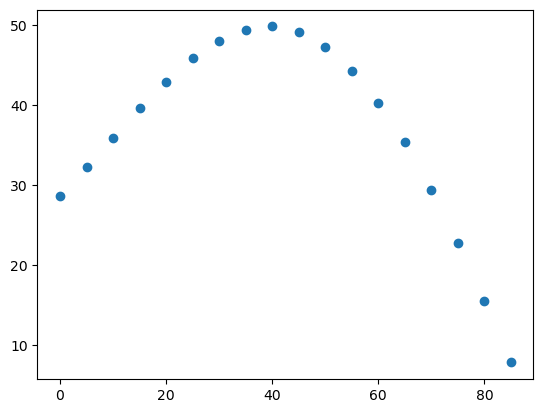

In [87]:
def plot_trajectory_metric(metric_fn, theta_values, **kwargs):
    data = list(map(lambda theta: metric_fn(trajectory(theta, **kwargs)), theta_values))
    plt.scatter(theta_values, data)

plot_trajectory_metric(landing_position,range(0,90,5), height=10)

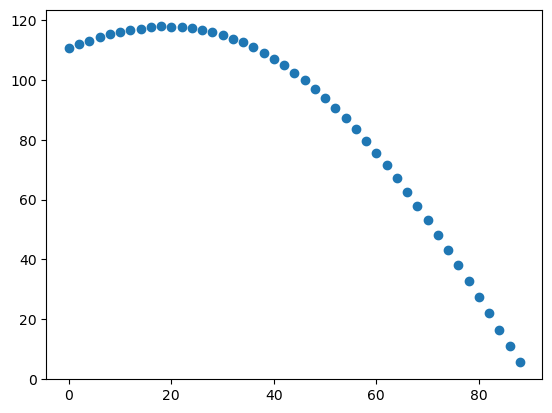

In [88]:
plot_trajectory_metric(landing_position, range(0,90,2), height=150)

In [89]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

In [90]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

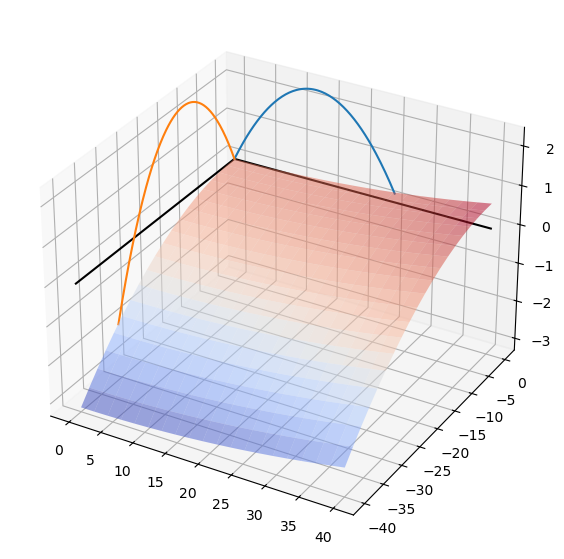

In [91]:
plot_trajectories_3d(
   trajectory_3d(20,0,elevation=ridge),
   trajectory_3d(20,270,elevation=ridge),
   bounds=[0,40,-40,0],
   elevation=ridge)

In [92]:
trajectory_3d(20,0,elevation=flat_ground)

([0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999,
  0.11999999999999998,
  0.12999999999999998,
  0.13999999999999999,
  0.15,
  0.16,
  0.17,
  0.18000000000000002,
  0.19000000000000003,
  0.20000000000000004,
  0.21000000000000005,
  0.22000000000000006,
  0.23000000000000007,
  0.24000000000000007,
  0.25000000000000006,
  0.26000000000000006,
  0.2700000000000001,
  0.2800000000000001,
  0.2900000000000001,
  0.3000000000000001,
  0.3100000000000001,
  0.3200000000000001,
  0.3300000000000001,
  0.34000000000000014,
  0.35000000000000014,
  0.36000000000000015,
  0.37000000000000016,
  0.38000000000000017,
  0.3900000000000002,
  0.4000000000000002,
  0.4100000000000002,
  0.4200000000000002,
  0.4300000000000002,
  0.4400000000000002,
  0.45000000000000023,
  0.46000000000000024,
  0.47000000000000025,
  0.48000000000000026,
  0.49000000000000027,
  0.5000000000000002,
  0.5100000000000002,
 

In [93]:
landing_distance(30, 240)

35.916035408374846

In [94]:
landing_distance_gradient(30, 180)

(0.7112472665731846, 0.0)

In [96]:
gradient_ascent(landing_distance, 30, 180)

(45.45974503237394, 180.0)